## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 자동차 연비 예측 Regression model 작성

- auto-mpg.data - data file  


- auto-mpg.names - data 설명 file

    1. mpg:           continuous  
    2. cylinders:     multi-valued discrete  
    3. displacement:  continuous (배기량)   
    4. horsepower:    continuous  
    5. weight:        continuous  
    6. acceleration:  continuous  
    7. model year:    multi-valued discrete  
    8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
    9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\trimu\Miniconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\trimu\Miniconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\trimu\Miniconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\trimu\Miniconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dty

### Data load 및 Preprocessing

In [3]:
data_path = keras.utils.get_file("auto-mpg.data", 
                                 "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin'])

label = data.pop('mpg')

X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
X_train.shape

(294, 13)

### Regression Model Build

### train

### predict

### $r^2$ 계산

In [5]:
model = Sequential()

model.add(Dense(32, input_shape=(13,)))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))

In [6]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [7]:
history = model.fit(X_train, y_train, batch_size=128, epochs=500, validation_data=(X_test, y_test),
                   verbose=1)

Train on 294 samples, validate on 98 samples
Epoch 1/500
294/294 [==============================] - 1s 5ms/sample - loss: 592.1997 - mse: 592.1997 - val_loss: 656.2830 - val_mse: 656.2830
Epoch 2/500
294/294 [==============================] - 0s 99us/sample - loss: 583.7626 - mse: 583.7626 - val_loss: 647.7255 - val_mse: 647.7255
Epoch 3/500
294/294 [==============================] - 0s 99us/sample - loss: 575.4293 - mse: 575.4293 - val_loss: 639.3130 - val_mse: 639.3130
Epoch 4/500
294/294 [==============================] - 0s 102us/sample - loss: 567.1795 - mse: 567.1795 - val_loss: 630.9953 - val_mse: 630.9953
Epoch 5/500
294/294 [==============================] - 0s 112us/sample - loss: 558.9082 - mse: 558.9082 - val_loss: 622.4941 - val_mse: 622.4941
Epoch 6/500
294/294 [==============================] - 0s 105us/sample - loss: 550.5540 - mse: 550.5540 - val_loss: 613.5826 - val_mse: 613.5826
Epoch 7/500
294/294 [==============================] - 0s 109us/sample - loss: 541.7931 -

Epoch 58/500
294/294 [==============================] - 0s 95us/sample - loss: 12.8985 - mse: 12.8985 - val_loss: 11.9741 - val_mse: 11.9741
Epoch 59/500
294/294 [==============================] - 0s 99us/sample - loss: 12.6591 - mse: 12.6591 - val_loss: 11.7044 - val_mse: 11.7044
Epoch 60/500
294/294 [==============================] - 0s 105us/sample - loss: 12.4271 - mse: 12.4271 - val_loss: 11.4907 - val_mse: 11.4907
Epoch 61/500
294/294 [==============================] - 0s 92us/sample - loss: 12.2080 - mse: 12.2080 - val_loss: 11.3501 - val_mse: 11.3501
Epoch 62/500
294/294 [==============================] - 0s 95us/sample - loss: 12.0067 - mse: 12.0067 - val_loss: 11.2190 - val_mse: 11.2190
Epoch 63/500
294/294 [==============================] - 0s 88us/sample - loss: 11.8256 - mse: 11.8256 - val_loss: 11.0940 - val_mse: 11.0940
Epoch 64/500
294/294 [==============================] - 0s 92us/sample - loss: 11.6425 - mse: 11.6425 - val_loss: 10.9763 - val_mse: 10.9763
Epoch 65/500

294/294 [==============================] - 0s 95us/sample - loss: 7.5717 - mse: 7.5717 - val_loss: 8.8786 - val_mse: 8.8786
Epoch 118/500
294/294 [==============================] - 0s 102us/sample - loss: 7.5435 - mse: 7.5435 - val_loss: 8.8096 - val_mse: 8.8096
Epoch 119/500
294/294 [==============================] - 0s 92us/sample - loss: 7.5128 - mse: 7.5128 - val_loss: 8.7964 - val_mse: 8.7964
Epoch 120/500
294/294 [==============================] - 0s 95us/sample - loss: 7.4758 - mse: 7.4758 - val_loss: 8.8453 - val_mse: 8.8453
Epoch 121/500
294/294 [==============================] - 0s 85us/sample - loss: 7.4322 - mse: 7.4322 - val_loss: 8.9082 - val_mse: 8.9082
Epoch 122/500
294/294 [==============================] - 0s 88us/sample - loss: 7.4060 - mse: 7.4060 - val_loss: 8.9686 - val_mse: 8.9686
Epoch 123/500
294/294 [==============================] - 0s 102us/sample - loss: 7.3747 - mse: 7.3747 - val_loss: 9.0291 - val_mse: 9.0291
Epoch 124/500
294/294 [=======================

294/294 [==============================] - 0s 92us/sample - loss: 6.2750 - mse: 6.2750 - val_loss: 8.1874 - val_mse: 8.1874
Epoch 177/500
294/294 [==============================] - 0s 95us/sample - loss: 6.2577 - mse: 6.2577 - val_loss: 8.1982 - val_mse: 8.1982
Epoch 178/500
294/294 [==============================] - 0s 85us/sample - loss: 6.2462 - mse: 6.2462 - val_loss: 8.1914 - val_mse: 8.1914
Epoch 179/500
294/294 [==============================] - 0s 92us/sample - loss: 6.2471 - mse: 6.2471 - val_loss: 8.1716 - val_mse: 8.1716
Epoch 180/500
294/294 [==============================] - 0s 88us/sample - loss: 6.2294 - mse: 6.2294 - val_loss: 8.1510 - val_mse: 8.1510
Epoch 181/500
294/294 [==============================] - 0s 85us/sample - loss: 6.2198 - mse: 6.2198 - val_loss: 8.1498 - val_mse: 8.1498
Epoch 182/500
294/294 [==============================] - 0s 92us/sample - loss: 6.2081 - mse: 6.2081 - val_loss: 8.1578 - val_mse: 8.1578
Epoch 183/500
294/294 [=========================

294/294 [==============================] - 0s 102us/sample - loss: 5.8575 - mse: 5.8575 - val_loss: 7.6774 - val_mse: 7.6774
Epoch 236/500
294/294 [==============================] - 0s 95us/sample - loss: 5.8544 - mse: 5.8544 - val_loss: 7.6603 - val_mse: 7.6603
Epoch 237/500
294/294 [==============================] - 0s 88us/sample - loss: 5.8480 - mse: 5.8480 - val_loss: 7.6862 - val_mse: 7.6862
Epoch 238/500
294/294 [==============================] - 0s 95us/sample - loss: 5.8459 - mse: 5.8459 - val_loss: 7.7760 - val_mse: 7.7760
Epoch 239/500
294/294 [==============================] - 0s 95us/sample - loss: 5.8414 - mse: 5.8414 - val_loss: 7.8465 - val_mse: 7.8465
Epoch 240/500
294/294 [==============================] - 0s 109us/sample - loss: 5.8391 - mse: 5.8391 - val_loss: 7.8776 - val_mse: 7.8776
Epoch 241/500
294/294 [==============================] - 0s 95us/sample - loss: 5.8358 - mse: 5.8358 - val_loss: 7.8720 - val_mse: 7.8720
Epoch 242/500
294/294 [=======================

294/294 [==============================] - 0s 119us/sample - loss: 5.6726 - mse: 5.6726 - val_loss: 7.8275 - val_mse: 7.8275
Epoch 295/500
294/294 [==============================] - 0s 109us/sample - loss: 5.6715 - mse: 5.6715 - val_loss: 7.8146 - val_mse: 7.8146
Epoch 296/500
294/294 [==============================] - 0s 99us/sample - loss: 5.6633 - mse: 5.6633 - val_loss: 7.7818 - val_mse: 7.7818
Epoch 297/500
294/294 [==============================] - 0s 105us/sample - loss: 5.6545 - mse: 5.6545 - val_loss: 7.7453 - val_mse: 7.7453
Epoch 298/500
294/294 [==============================] - 0s 102us/sample - loss: 5.6414 - mse: 5.6414 - val_loss: 7.7173 - val_mse: 7.7173
Epoch 299/500
294/294 [==============================] - 0s 112us/sample - loss: 5.6390 - mse: 5.6390 - val_loss: 7.6744 - val_mse: 7.6744
Epoch 300/500
294/294 [==============================] - 0s 102us/sample - loss: 5.6358 - mse: 5.6358 - val_loss: 7.6395 - val_mse: 7.6395
Epoch 301/500
294/294 [===================

294/294 [==============================] - 0s 102us/sample - loss: 5.4901 - mse: 5.4901 - val_loss: 7.6073 - val_mse: 7.6073
Epoch 354/500
294/294 [==============================] - 0s 99us/sample - loss: 5.4933 - mse: 5.4933 - val_loss: 7.6431 - val_mse: 7.6431
Epoch 355/500
294/294 [==============================] - 0s 99us/sample - loss: 5.4842 - mse: 5.4842 - val_loss: 7.7887 - val_mse: 7.7887
Epoch 356/500
294/294 [==============================] - 0s 102us/sample - loss: 5.5343 - mse: 5.5343 - val_loss: 7.9245 - val_mse: 7.9245
Epoch 357/500
294/294 [==============================] - 0s 95us/sample - loss: 5.5051 - mse: 5.5051 - val_loss: 7.8021 - val_mse: 7.8021
Epoch 358/500
294/294 [==============================] - 0s 92us/sample - loss: 5.4885 - mse: 5.4885 - val_loss: 7.7058 - val_mse: 7.7058
Epoch 359/500
294/294 [==============================] - 0s 99us/sample - loss: 5.4791 - mse: 5.4791 - val_loss: 7.6466 - val_mse: 7.6466
Epoch 360/500
294/294 [=======================

294/294 [==============================] - 0s 109us/sample - loss: 5.3572 - mse: 5.3572 - val_loss: 7.5769 - val_mse: 7.5769
Epoch 413/500
294/294 [==============================] - 0s 99us/sample - loss: 5.3593 - mse: 5.3593 - val_loss: 7.5105 - val_mse: 7.5105
Epoch 414/500
294/294 [==============================] - 0s 92us/sample - loss: 5.3496 - mse: 5.3496 - val_loss: 7.4703 - val_mse: 7.4703
Epoch 415/500
294/294 [==============================] - 0s 109us/sample - loss: 5.3466 - mse: 5.3466 - val_loss: 7.4254 - val_mse: 7.4254
Epoch 416/500
294/294 [==============================] - 0s 92us/sample - loss: 5.3478 - mse: 5.3478 - val_loss: 7.3746 - val_mse: 7.3746
Epoch 417/500
294/294 [==============================] - 0s 92us/sample - loss: 5.3551 - mse: 5.3551 - val_loss: 7.3402 - val_mse: 7.3402
Epoch 418/500
294/294 [==============================] - 0s 95us/sample - loss: 5.3591 - mse: 5.3591 - val_loss: 7.3723 - val_mse: 7.3723
Epoch 419/500
294/294 [=======================

294/294 [==============================] - 0s 105us/sample - loss: 5.2239 - mse: 5.2239 - val_loss: 7.5614 - val_mse: 7.5614
Epoch 472/500
294/294 [==============================] - 0s 122us/sample - loss: 5.2197 - mse: 5.2197 - val_loss: 7.5543 - val_mse: 7.5543
Epoch 473/500
294/294 [==============================] - 0s 122us/sample - loss: 5.2266 - mse: 5.2266 - val_loss: 7.5446 - val_mse: 7.5446
Epoch 474/500
294/294 [==============================] - 0s 116us/sample - loss: 5.2182 - mse: 5.2182 - val_loss: 7.5504 - val_mse: 7.5504
Epoch 475/500
294/294 [==============================] - 0s 112us/sample - loss: 5.2183 - mse: 5.2183 - val_loss: 7.5495 - val_mse: 7.5495
Epoch 476/500
294/294 [==============================] - 0s 99us/sample - loss: 5.2134 - mse: 5.2134 - val_loss: 7.5842 - val_mse: 7.5842
Epoch 477/500
294/294 [==============================] - 0s 88us/sample - loss: 5.2105 - mse: 5.2105 - val_loss: 7.6321 - val_mse: 7.6321
Epoch 478/500
294/294 [====================

In [8]:
y_predict = model.predict(X_test)

In [9]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.8973833069756387

In [10]:
rawdata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [11]:
X_test

array([[-1.01338756, -0.99699347, -1.22124067, ..., -1.38234984,
        -0.40824829,  1.99575821],
       [ 1.01302823,  0.91879791,  0.53569517, ...,  0.72340588,
        -0.40824829, -0.5010627 ],
       [-0.9461605 , -0.57709399, -0.92052524, ..., -1.38234984,
         2.44948974, -0.5010627 ],
       ...,
       [ 1.16669009,  1.0500165 ,  1.35378322, ...,  0.72340588,
        -0.40824829, -0.5010627 ],
       [-0.85012183, -0.31465682, -0.71689116, ..., -1.38234984,
        -0.40824829,  1.99575821],
       [-0.95576436, -0.78704373, -0.97735335, ..., -1.38234984,
        -0.40824829,  1.99575821]])

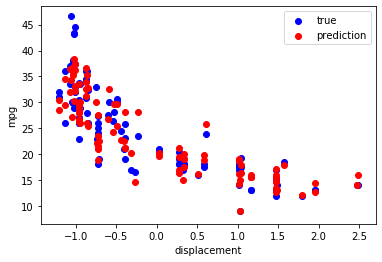

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_test[:, 0], y_test, c='b', label="true")
plt.scatter(X_test[:, 0], y_predict, c='r', label="prediction")
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.legend()

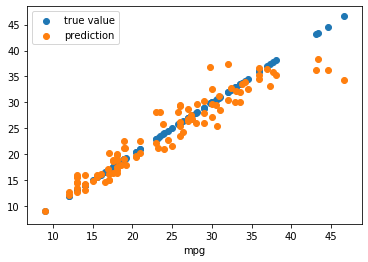

In [17]:
plt.scatter(y_test, y_test, label='true value')
plt.scatter(y_test, y_predict, label='prediction')
plt.xlabel('mpg')
plt.legend()